<a id='top'></a>
# Challenge Set 4
Topic:        Linear Regression and Learning Curve challenges  
Date:         07/25/2016  
Name:         Whitney Chia  
Worked with:  Help from Michelle.

[Question 1](#question1)   
[Question 2](#question2)   
[Question 3](#question3)   
[Question 4](#question4)

<a id='question1'></a>
# Question 1   
[Top](#top)

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from patsy import dmatrices
import statsmodels.api as sm
pd.options.display.max_rows = 999
plt.style.use('ggplot')
sns.set_context('poster')
sns.set_style('darkgrid')
sns.set_palette('dark')

In [50]:
df = pd.DataFrame()

In [51]:
import random
df['x_val'] = [np.random.randint(1,1000) for x in range(1000)]
df['x_val_2'] = [x**2 for x in df['x_val']]
df['log_x'] = [np.log(x) for x in df['x_val']]
df['epsilon'] = [np.random.normal() for x in df['x_val']]
df['Y_values'] = df['log_x'] * 9 + 25 + df['epsilon']

In [52]:
df.head()

,x_val,x_val_2,log_x,epsilon,Y_values
0,302,91204,5.710427,0.307446,76.701289
1,685,469225,6.529419,0.002747,83.767516
2,896,802816,6.797940,0.954731,87.136194
3,257,66049,5.549076,1.251284,76.192969
4,467,218089,6.146329,0.540442,80.857406


In [53]:
y, X = dmatrices('Y_values ~ x_val_2', data=df, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
pred = results.predict(X)

This is a plot of the linear regression line that we would get from fitting x squared. It's a really bad fit for the data and is not a good predictor of the Y value in the dataset. Since we built the data with the log(x), I expect the log(x) fit to be much better. Squaring our X will not get us anything.

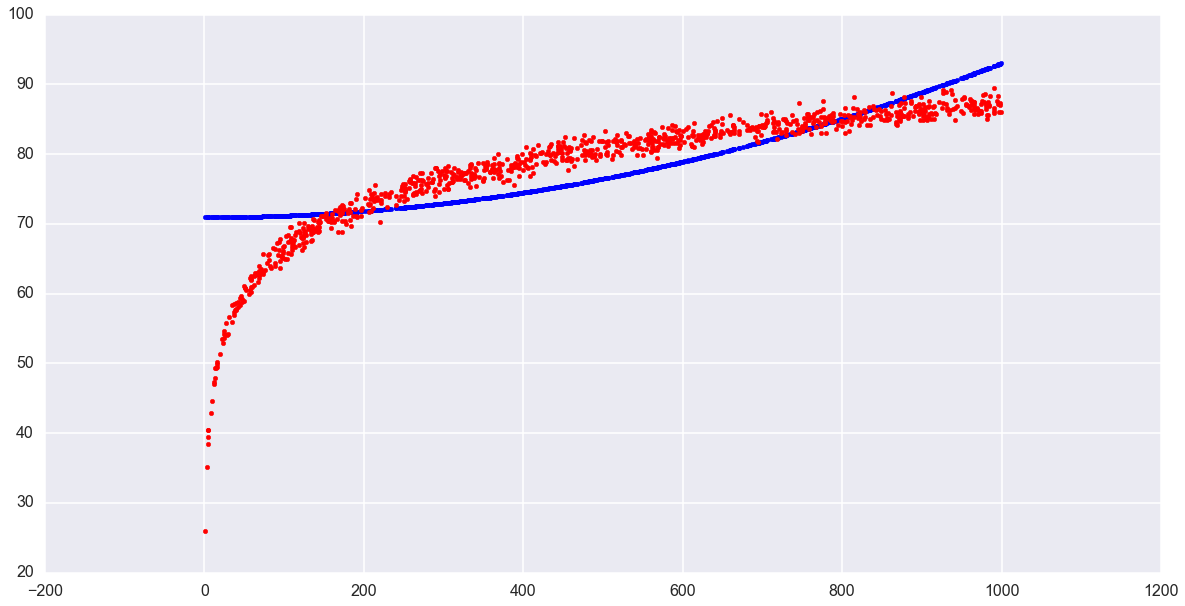

In [54]:
Y = list(pred)
X = list(df['x_val'])
real_val = list(df['Y_values'])
plt.figure(figsize=(20,10))
plt.scatter(X, Y, color='blue')
plt.scatter(X, real_val, color='red')

Now, let's fit to the log of x, since the model that we generated the data from used the log of x, this should fit the data very nicely.

In [55]:
Y, X = dmatrices('Y-values ~ log_x', data=df, return_type='dataframe')
sqmodel = sm.OLS(Y, X)
results = sqmodel.fit()
pred = results.predict(X)

We can see that it does indeed fit the data much better than our squared x model. 

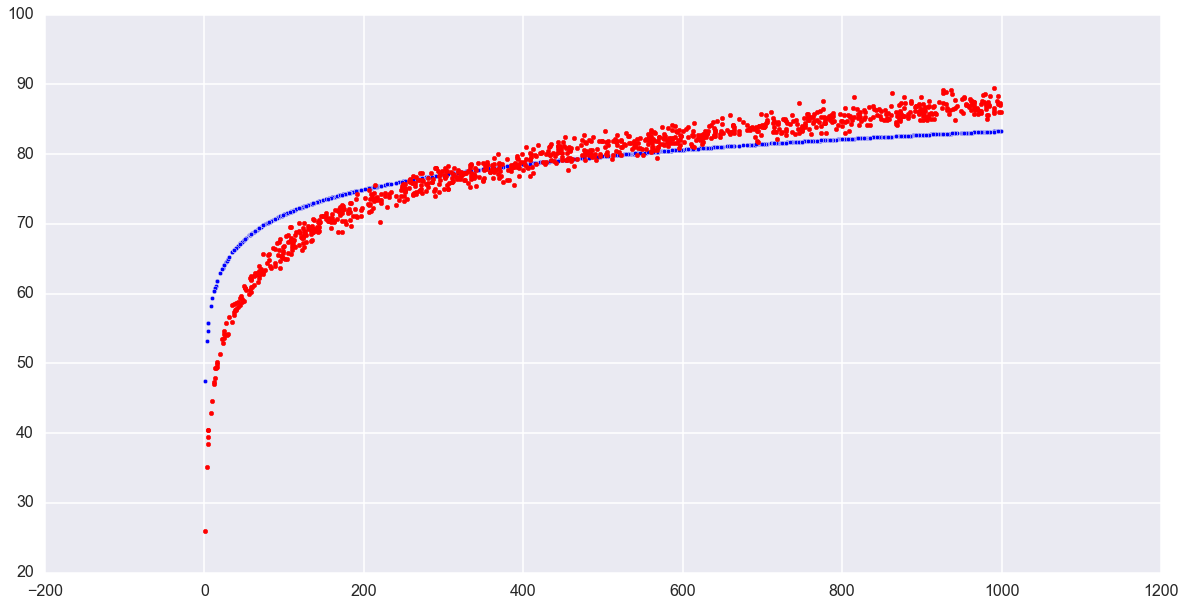

In [56]:
Y = list(pred)
X = list(df['x_val'])
real_val = list(df['Y_values'])
plt.figure(figsize=(20,10))
plt.scatter(X, Y)
plt.scatter(X, real_val, color='red')

<a id='question2'></a>
# Question 2    
[Top](#top)

In [57]:
df2 = pd.DataFrame()

In [58]:
import random
df2['x_val_1'] = [np.random.randint(1,1000) for x in range(1000)]
df2['x_val_2'] = [x**2 for x in df2['x_val_1']]
df2['epsilon'] = [np.random.normal() for x in df2['x_val_1']]
df2['Y_values'] = df2['x_val_1'] * 9 + df2['x_val_2'] * 15 + 25 + df2['epsilon']

In [59]:
df2.head()

,x_val_1,x_val_2,epsilon,Y_values
0,308,94864,-1.554362,1.425755e+06
1,128,16384,-1.831601,2.469352e+05
2,470,220900,0.093962,3.317755e+06
3,502,252004,-0.402875,3.784603e+06
4,66,4356,-0.499360,6.595850e+04


In [60]:
Y, X = dmatrices('Y-values ~ x_val_1 + x_val_2 + epsilon', data=df2, return_type='dataframe')

In [61]:
from sklearn import cross_validation as cv
from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

In [62]:
x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=0.25,random_state=1234)

In [63]:
kf = KFold(x_train.shape[0], n_folds=3, shuffle=True)

lr_fold_mse = []

for train, val in kf:
    train_x = x_train.iloc[train]
    val_x = x_train.iloc[val]
    train_y = y_train.iloc[train]
    val_y = y_train.iloc[val]
    
    rgr = LinearRegression()
    rgr.fit(train_x, train_y)
    pred = rgr.predict(val_x)
    lr_fold_mse.append((np.array(val_y).flatten() - pred)**2)
    
print np.mean(lr_fold_mse)

77.9450851128


In [64]:
pred_rgr = rgr.predict(x_test)
print mean_squared_error(y_test, pred_rgr)

66.9535320729


After creating the data set, I split it into a 75% training 25% test set. I then ran a cross validation with Kfolds into 3 folds.  I took the average of the 3 folds and my mean squared error was 77.9450851128. I then ran the same model on the test set and my mean squared error was 66.9535320729 which is reasonably close.

<a id='question3'></a>
# Question 3     
[Top](#top)

I think the challenge is asking us to fit a model based on each polynomial from 0 to 7. So we'll fit to Y = x, then Y = x squared, then Y = x cubed and so on until we reach Y = x ^ 7. Then we calculate how each model performs and compare them in a plot.

In [65]:
df2.head()

,x_val_1,x_val_2,epsilon,Y_values
0,308,94864,-1.554362,1.425755e+06
1,128,16384,-1.831601,2.469352e+05
2,470,220900,0.093962,3.317755e+06
3,502,252004,-0.402875,3.784603e+06
4,66,4356,-0.499360,6.595850e+04


In [66]:
for i in range(3,8):
    df2['x_val_' + str(i)] = [x ** i for x in df2['x_val_1']]
    
df2['x_val_0'] = [365 for x in df2['x_val_1']]

In [98]:
from statsmodels.tools import eval_measures
train_mse = []
test_mse =[]
r_squared = []
bic = []
aic = []

for i in range(0,8):
    y, X = dmatrices('Y-values ~ x_val_{}'.format(i), data=df2, return_type='dataframe')
    x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=0.25,random_state=1234)
    
    kf = KFold(x_train.shape[0], n_folds=3, shuffle=True)

    lr_fold_mse = []

    for train, val in kf:
        train_x = x_train.iloc[train]
        val_x = x_train.iloc[val]
        train_y = y_train.iloc[train]
        val_y = y_train.iloc[val]

        model = sm.OLS(train_y, train_x)
        results = model.fit()
        pred = results.predict(val_x)
        lr_fold_mse.append((np.array(val_y).flatten() - pred)**2)
        
        pred_rgr = results.predict(x_test)
        
    test_mse.append(mean_squared_error(y_test, pred_rgr))
    train_mse.append(np.mean(lr_fold_mse))
    r_squared.append(results.rsquared)
    bic.append(results.bic)
    aic.append(results.aic)

In [121]:
df_eval = pd.DataFrame([test_mse, train_mse, r_squared, bic, aic], index=['test_mse', 'train_mse', 'r_squared', 'bic', 'aic'])

In [129]:
df_eval.columns=['constant', 'power of 1', 'power of 2', 'power of 3', 'power of 4', 'power of 5', 'power of 6', 'power of 7']

In [134]:
df_eval = df_eval.transpose()

In [135]:
df_eval

,test_mse,train_mse,r_squared,bic,aic
constant,22.145385,25.776386,0.000000,3029.820759,3025.606151
power of 1,22.161300,25.598455,0.001332,3061.244366,3052.815150
power of 2,22.166066,25.796453,0.002681,3030.859903,3022.430687
power of 3,22.163906,25.721645,0.002616,3001.272153,2992.842936
power of 4,22.156507,25.640713,0.000310,3059.219269,3050.790053
power of 5,22.157099,25.714591,0.001548,2983.419222,2974.990006
power of 6,4573.778350,4462.382471,-186.871962,5628.329593,5624.114984
power of 7,5995.002736,6062.576484,-235.290267,5780.237461,5776.022853


ZERO CONFIDENCE that this is correct.

<a id='question4'></a>
# Question 4   
[Top](#top)

In [182]:
train_mse = []
test_mse =[]

for i in range(5,1001,5):
    test = df2[:i]
    
    y, X = dmatrices('Y_values ~ x_val_2'.format(i), data=test, return_type='dataframe')
    x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=0.20,random_state=1234)

    kf = KFold(x_train.shape[0], n_folds=4, shuffle=True)

    lr_fold_mse = []

    for train, val in kf:
        train_x = x_train.iloc[train]
        val_x = x_train.iloc[val]
        train_y = y_train.iloc[train]
        val_y = y_train.iloc[val]

        model = sm.OLS(train_y, train_x)
        results = model.fit()
        pred = results.predict(val_x)
        lr_fold_mse.append((np.array(val_y).flatten() - pred)**2)

        pred_rgr = results.predict(x_test)

    test_mse.append(mean_squared_error(y_test, pred_rgr))
    train_mse.append(np.mean(lr_fold_mse))

In [183]:
df_eval = pd.DataFrame([test_mse, train_mse], index=['test_mse', 'train_mse'])

In [184]:
df_eval = df_eval.transpose()

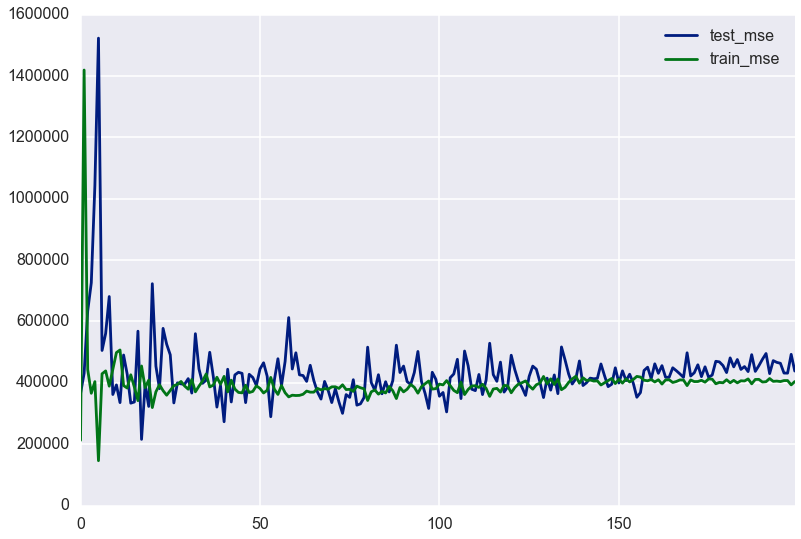

In [188]:
df_eval.plot()